**Linear Regression - Gradient Descent**

  

*   To implement linear regression using gradient descent to predict housing prices based on the area of the houses.






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
def gradient_descent(x,y,l_r,epochs):
  m,b=0,0
  cost_history=[]
  for epoch in range(epochs):
    y_pred=m*x+b
    cost=mean_squared_error(y,y_pred)
    m_grad= -2*np.mean(x*(y-y_pred))
    b_grad= -2*np.mean((y-y_pred))
    m-=l_r*m_grad
    b-=l_r*b_grad
    cost_history.append(cost)
  return m,b,cost_history

In [ ]:
W=1000
b=0

In [ ]:
def predict(x, w, b):
    p = np.dot(x, w) + b
    return p

In [ ]:
df=pd.read_csv("/content/Housing.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
x=df.drop(columns="price")
y=df["price"]

In [ ]:
result=predict(df["area"],W,b)
print(result[:5])
print(np.array(y[:5]))

[7420000 8960000 9960000 7500000 7420000]
[13300000 12250000 12250000 12215000 11410000]


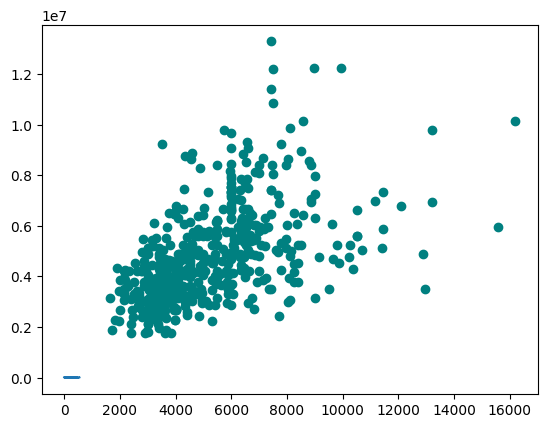

In [ ]:
plt.scatter(df["area"],y,color='teal')
plt.plot(df["area"])

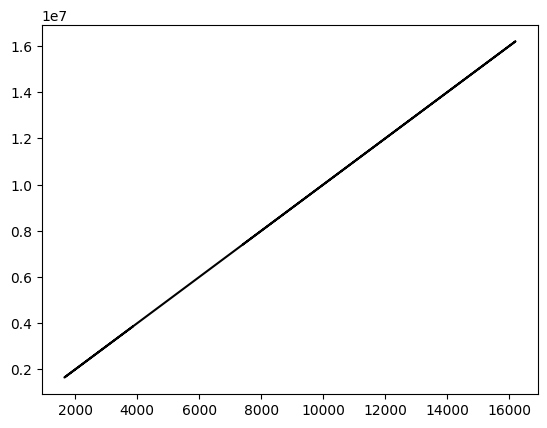

In [ ]:

plt.plot(df["area"],result,color='black')

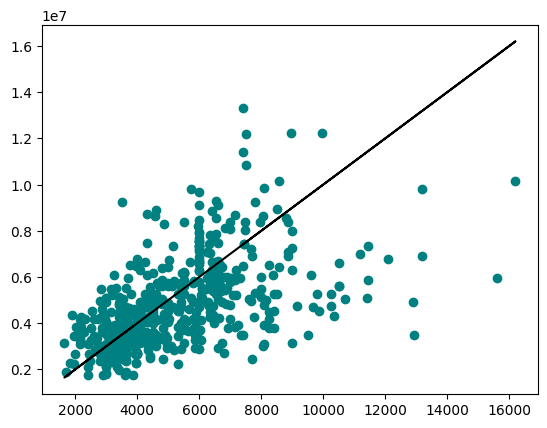

In [ ]:
plt.scatter(df["area"],y, color='teal')
plt.plot(df["area"],result,color='black')

In [ ]:
l_r=0.001
epochs=100

In [ ]:
scalar=StandardScaler()
x=scalar.fit_transform(np.array(x["area"]).reshape(-1,1))
y=scalar.fit_transform(np.array(y).reshape(-1,1))

In [ ]:
slope,intercept,cost_history=gradient_descent(x,y,l_r,epochs)

FINAL COST: 0.9059804083868048


Text(0, 0.5, 'mean_squared_error')

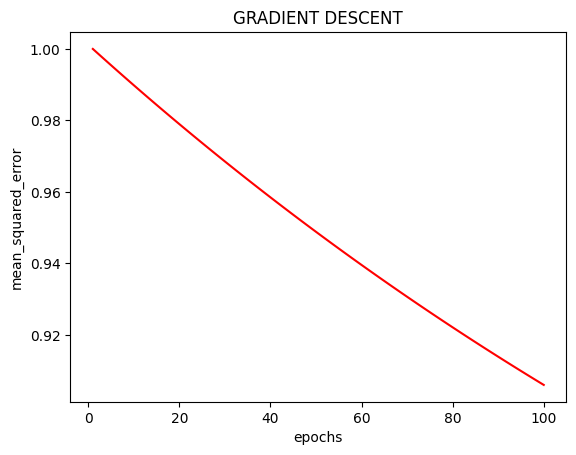

In [ ]:
final_cost=cost_history[-1]
print("FINAL COST:",final_cost)
plt.plot(range(1,epochs+1),cost_history,color='red')
plt.title('GRADIENT DESCENT')
plt.xlabel('epochs')
plt.ylabel('mean_squared_error')


In [ ]:
def get_user_input():
    area = float(input("Enter the area of the house (in square feet): "))
    return area

def predict_price(user_input, slope, intercept, scaler):
    user_input_scaled = scaler.transform(np.array([[user_input]]))
    price = slope * user_input_scaled + intercept
    price_unscaled = scaler.inverse_transform(price)
    return price_unscaled

user_input = get_user_input()
predicted_price = predict_price(user_input, slope, intercept, scalar)

print(f"The predicted price of the house with area {user_input} square feet is: ${predicted_price[0][0]:.2f}")


Enter the area of the house (in square feet): 900
The predicted price of the house with area 900.0 square feet is: $4303263.26


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
slope, intercept, cost_history = gradient_descent(X_train, y_train, l_r, epochs)
y_pred = slope * X_test + intercept
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Absolute Error (MAE): 0.90
Mean Squared Error (MSE): 1.35
R-squared (R2): 0.06
